In [1]:
import sys
import os
from pathlib import Path

pwd  = Path(os.getcwd())
sys.path.append(str(pwd.parent.parent)) # needed to use "koray" module

In [2]:
import pandas as pd
import numpy as np

In [3]:
from koray.feature_calculation.util import get_features


conference_invitations = [
# 'NeurIPS.cc/2022/Conference/-/Blind_Submission',
'ICLR.cc/2023/Conference/-/Blind_Submission',
# 'ICLR.cc/2022/Conference/-/Blind_Submission',
# 'ICLR.cc/2021/Conference/-/Blind_Submission',
]

# feature_df = list(get_features(conference_invitations, disable_cache=True))
feature_df = list(get_features(conference_invitations, disable_cache=False))
df = pd.concat(feature_df)
df


✔ Successfully calculated features


,paper_id,abstract_length,author_count,is_accepted,keyword_count,metareview_length,reviewer_confidence_nanmax,reviewer_confidence_nanmean,reviewer_confidence_nanmedian,reviewer_confidence_nanmin,...,reviewer_technical_novelty_and_significance_nanmax,reviewer_technical_novelty_and_significance_nanmean,reviewer_technical_novelty_and_significance_nanmedian,reviewer_technical_novelty_and_significance_nanmin,reviewer_technical_novelty_and_significance_nanprod,reviewer_technical_novelty_and_significance_nanstd,reviewer_technical_novelty_and_significance_nansum,reviewer_technical_novelty_and_significance_nanvar,title_length,tldr_length
0,-0tPmzgXS5,"3795 1197 Name: content, dtype: int64","3795 5 Name: content, dtype: int64",False,"3795 3 Name: content, dtype: int64",None,4.0,4.000000,4.0,4.0,...,3.0,2.666667,3.0,2.0,18.0,0.471405,8.0,0.222222,"3795 46 Name: content, dtype: int64","3795 131 Name: content, dtype: int64"
1,-1x2-lp1eZf,"3794 1862 Name: content, dtype: int64","3794 7 Name: content, dtype: int64",False,"3794 3 Name: content, dtype: int64",None,5.0,4.200000,4.0,4.0,...,3.0,2.400000,2.0,2.0,72.0,0.489898,12.0,0.240000,"3794 74 Name: content, dtype: int64","3794 114 Name: content, dtype: int64"
2,-2zfgNS917,"3793 1497 Name: content, dtype: int64","3793 6 Name: content, dtype: int64",True,"3793 3 Name: content, dtype: int64",None,4.0,3.500000,3.5,3.0,...,3.0,2.250000,2.0,2.0,24.0,0.433013,9.0,0.187500,"3793 75 Name: content, dtype: int64","3793 97 Name: content, dtype: int64"
3,-4DiyBMgv9m,"3792 1246 Name: content, dtype: int64","3792 2 Name: content, dtype: int64",False,"3792 0 Name: content, dtype: int64",None,4.0,3.000000,3.0,2.0,...,3.0,2.800000,3.0,2.0,162.0,0.400000,14.0,0.160000,"3792 89 Name: content, dtype: int64","3792 0 Name: content, dtype: int64"
4,-4Maz7s3YXz,"3791 1366 Name: content, dtype: int64","3791 2 Name: content, dtype: int64",False,"3791 5 Name: content, dtype: int64",None,4.0,4.000000,4.0,4.0,...,3.0,2.666667,3.0,2.0,18.0,0.471405,8.0,0.222222,"3791 65 Name: content, dtype: int64","3791 125 Name: content, dtype: int64"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,zufPou5foW,"4 1393 Name: content, dtype: int64","4 5 Name: content, dtype: int64",False,"4 4 Name: content, dtype: int64",None,4.0,3.750000,4.0,3.0,...,2.0,2.000000,2.0,2.0,16.0,0.000000,8.0,0.000000,"4 82 Name: content, dtype: int64","4 0 Name: content, dtype: int64"
3792,zyLVMgsZ0U_,"3 1107 Name: content, dtype: int64","3 6 Name: content, dtype: int64",True,"3 6 Name: content, dtype: int64",None,4.0,3.250000,3.0,3.0,...,4.0,3.500000,3.5,3.0,144.0,0.500000,14.0,0.250000,"3 100 Name: content, dtype: int64","3 205 Name: content, dtype: int64"
3793,zyfEWkV6it,"2 1157 Name: content, dtype: int64","2 5 Name: content, dtype: int64",False,"2 3 Name: content, dtype: int64",None,5.0,4.000000,4.5,2.0,...,3.0,2.166667,2.0,1.0,72.0,0.687184,13.0,0.472222,"2 45 Name: content, dtype: int64","2 0 Name: content, dtype: int64"
3794,zzL_5WoI3I,"1 965 Name: content, dtype: int64","1 2 Name: content, dtype: int64",False,"1 3 Name: content, dtype: int64",None,4.0,3.666667,4.0,3.0,...,4.0,3.000000,3.0,2.0,24.0,0.816497,9.0,0.666667,"1 83 Name: content, dtype: int64","1 208 Name: content, dtype: int64"


In [6]:
df.dtypes

paper_id                                                  object
abstract_length                                           object
author_count                                              object
is_accepted                                                 bool
keyword_count                                             object
metareview_length                                         object
reviewer_confidence_nanmax                               float64
reviewer_confidence_nanmean                              float64
reviewer_confidence_nanmedian                            float64
reviewer_confidence_nanmin                               float64
reviewer_confidence_nanprod                              float64
reviewer_confidence_nanstd                               float64
reviewer_confidence_nansum                               float64
reviewer_confidence_nanvar                               float64
reviewer_correctness_nanmax                              float64
reviewer_correctness_nanm

In [4]:
# columns that have numerical values
numerical_columns = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]
numerical_columns

['reviewer_confidence_nanmax',
 'reviewer_confidence_nanmean',
 'reviewer_confidence_nanmedian',
 'reviewer_confidence_nanmin',
 'reviewer_confidence_nanprod',
 'reviewer_confidence_nanstd',
 'reviewer_confidence_nansum',
 'reviewer_confidence_nanvar',
 'reviewer_correctness_nanmax',
 'reviewer_correctness_nanmean',
 'reviewer_correctness_nanmedian',
 'reviewer_correctness_nanmin',
 'reviewer_correctness_nanprod',
 'reviewer_correctness_nanstd',
 'reviewer_correctness_nansum',
 'reviewer_correctness_nanvar',
 'reviewer_empirical_novelty_and_significance_nanmax',
 'reviewer_empirical_novelty_and_significance_nanmean',
 'reviewer_empirical_novelty_and_significance_nanmedian',
 'reviewer_empirical_novelty_and_significance_nanmin',
 'reviewer_empirical_novelty_and_significance_nanprod',
 'reviewer_empirical_novelty_and_significance_nanstd',
 'reviewer_empirical_novelty_and_significance_nansum',
 'reviewer_empirical_novelty_and_significance_nanvar',
 'reviewer_recommendation_nanmax',
 'revi

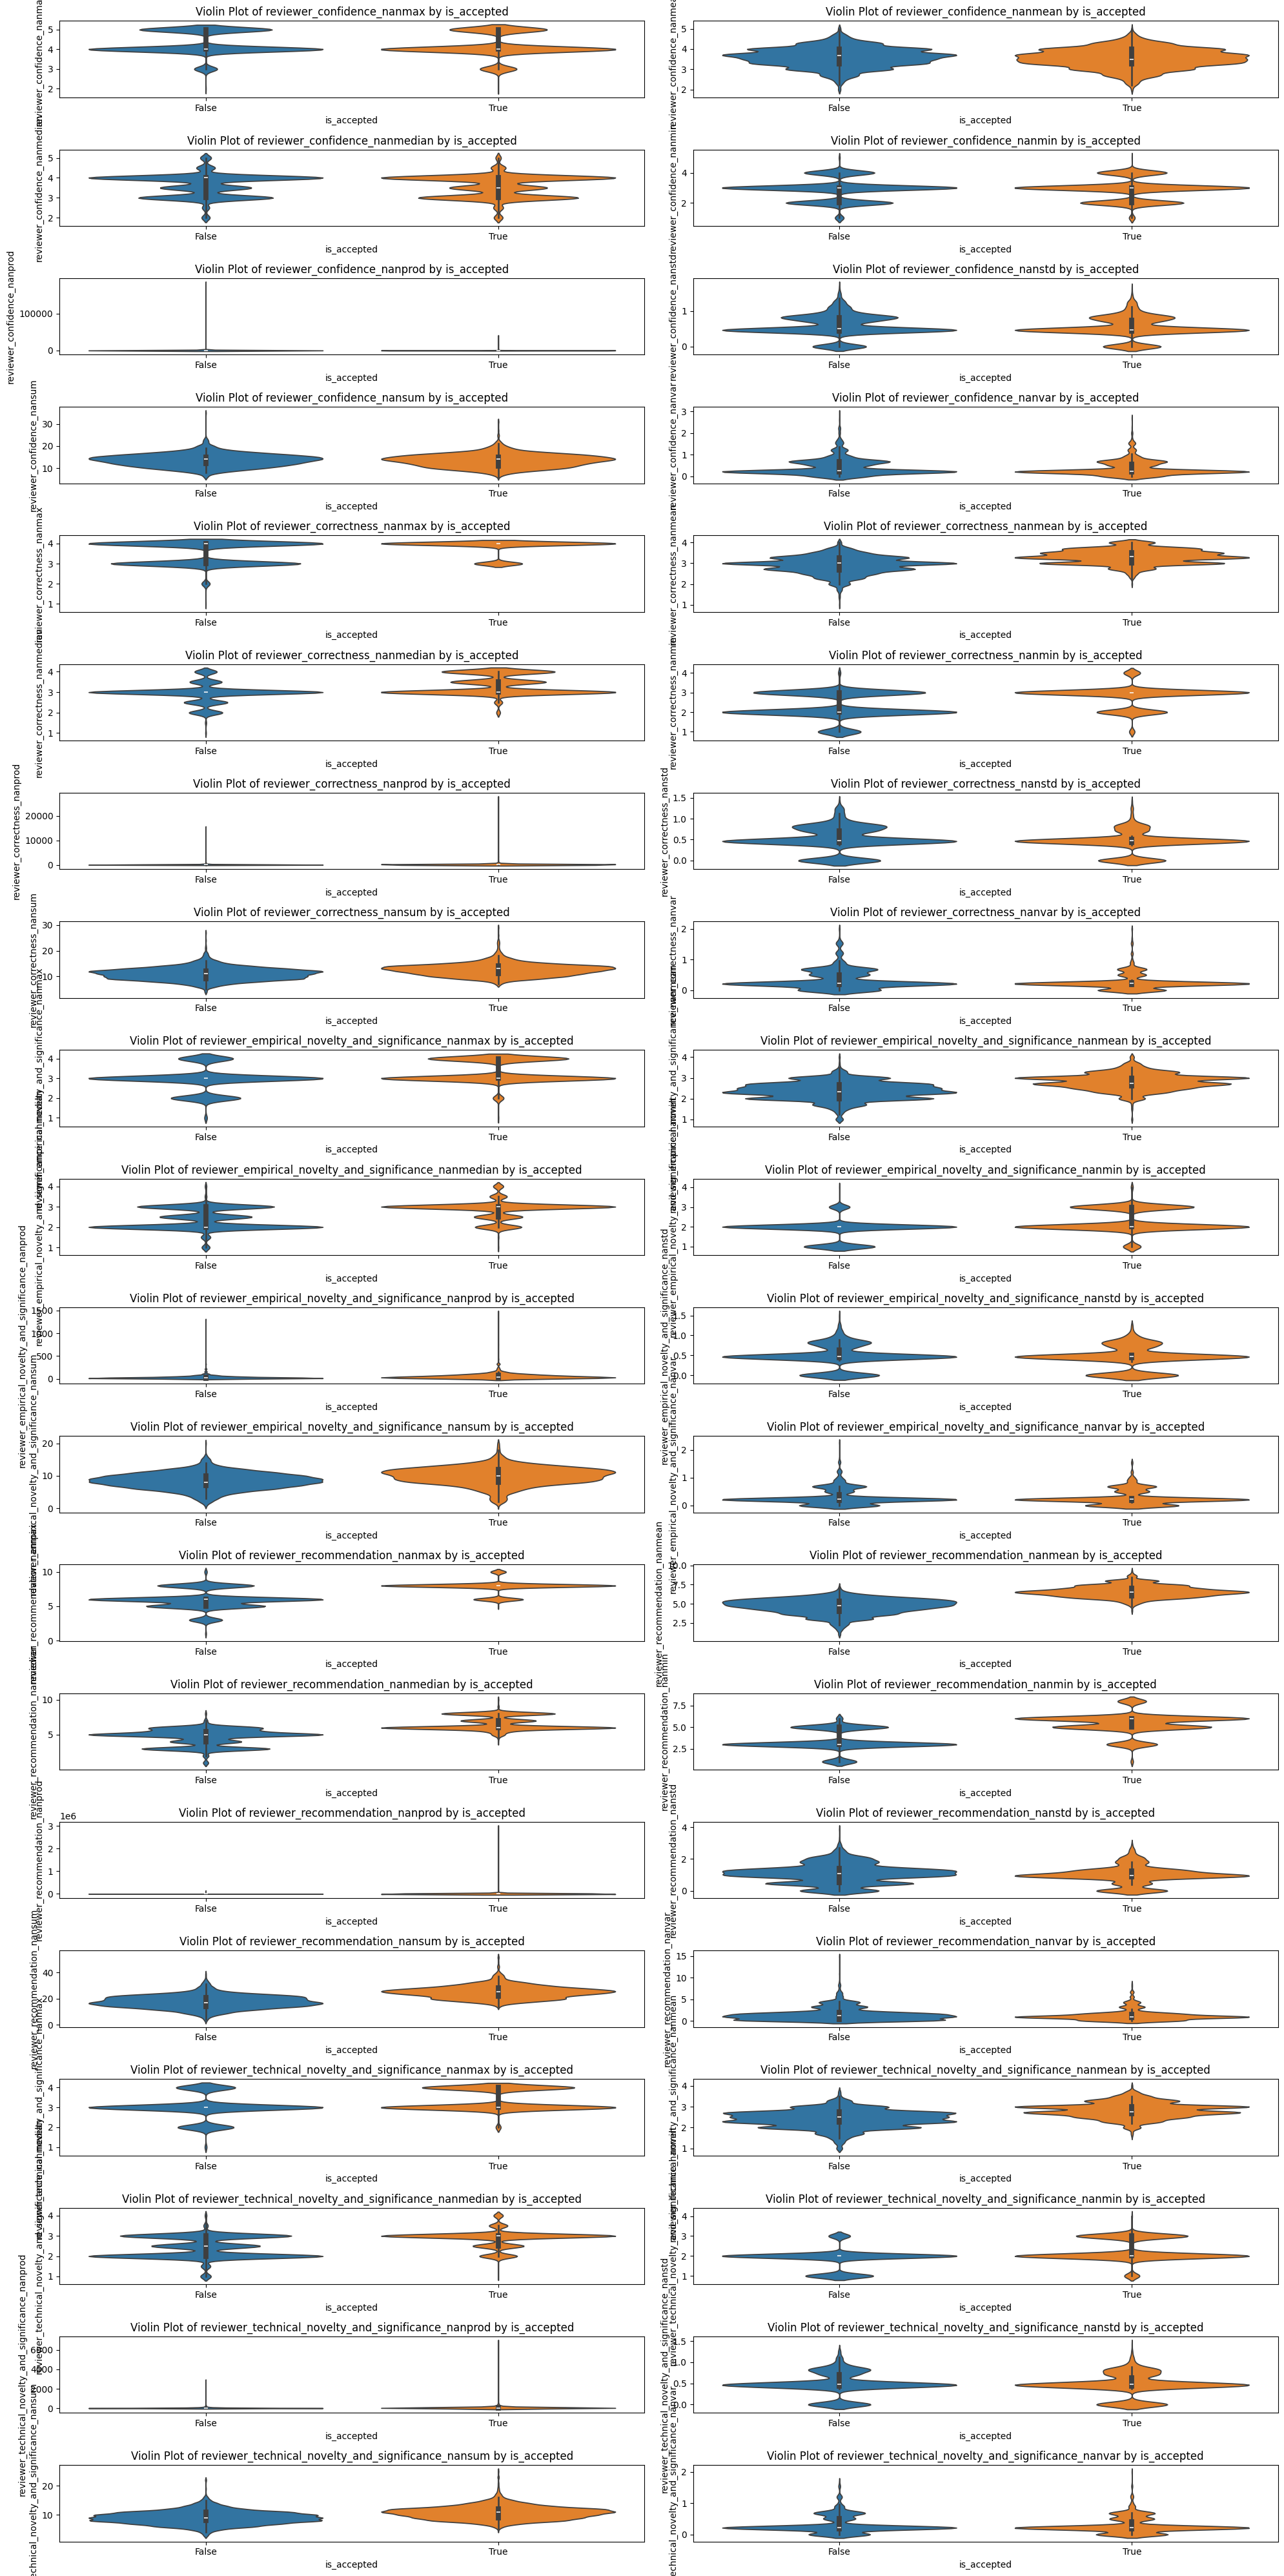

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the matplotlib figure
plt.figure(figsize=(20, 40))

# Iterate over numerical columns to create a violin plot for each
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 2, 2, i)  # Adjust number of rows/columns for subplots
    sns.violinplot(x='is_accepted', y=col, data=df, hue='is_accepted', legend=False)
    plt.title(f'Violin Plot of {col} by is_accepted')

plt.tight_layout()
plt.show()